Resistencia de puerto (Rp): 10.416666666666666
Conductancia G: 0.096
Capacitor – a = 0.7, b = 0.7 (esperado ≈ estado anterior)


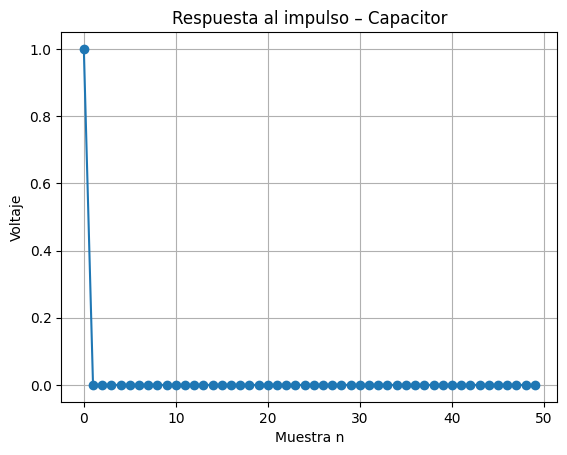

In [1]:
# 📘 Notebook 03: One-Ports Reactivos – Capacitor e Inductor

# 🧠 Objetivo del notebook
# Comprender cómo se modelan elementos que almacenan energía (capacitor e inductor) usando WDF.
# Cubrimos discretizaciones y su implementación en pywdf, siguiendo §1.3 de la tesis de Kurt Werner.

# -------------------------------------------------------------
# 📘 SECCIÓN 1 – Capacitor
# -------------------------------------------------------------

"""
Un capacitor ideal tiene la relación:
    i(t) = C * dv/dt

Al discretizar (por ejemplo con la regla trapezoidal):
    i[n] = (2C / T) * (v[n] - v[n-1]) - i[n-1]

La resistencia de puerto equivalente usada en WDF es:
    Rp = 1 / (2 * C * fs)

Esto convierte al capacitor en un one-port adaptado.
"""

from pywdf.core.wdf import Capacitor
import numpy as np

fs = 48000  # frecuencia de muestreo
C_val = 1e-6

C = Capacitor(C_val, fs)
print("Resistencia de puerto (Rp):", C.Rp)
print("Conductancia G:", C.G)

# Onda incidente arbitraria
a = 0.7
C.accept_incident_wave(a)
b = C.propagate_reflected_wave()
print(f"Capacitor – a = {a}, b = {b} (esperado ≈ estado anterior)")

# Reset y visualización temporal
def impulse_response(capacitor, steps=50):
    capacitor.reset()
    response = []
    a_vals = [1.0] + [0.0]*(steps-1)
    for a in a_vals:
        capacitor.accept_incident_wave(a)
        b = capacitor.propagate_reflected_wave()
        v = (a + b) / 2
        response.append(v)
    return response

import matplotlib.pyplot as plt

plt.plot(impulse_response(C), marker='o')
plt.title("Respuesta al impulso – Capacitor")
plt.xlabel("Muestra n")
plt.ylabel("Voltaje")
plt.grid(True)
plt.show()


Resistencia de puerto (Rp): 960.0
Conductancia G: 0.0010416666666666667
Inductor – a = 0.5, b = -0.5 (esperado ≈ -estado anterior)


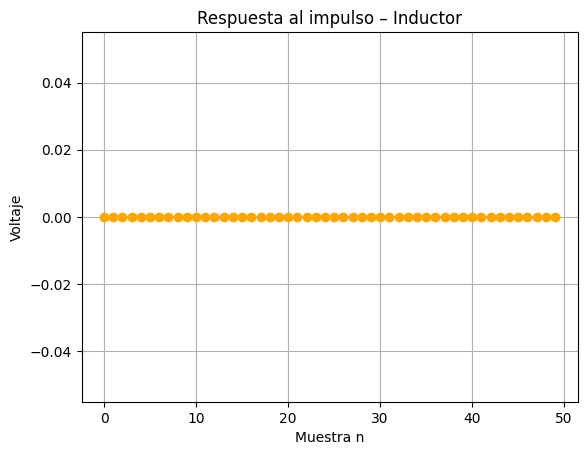

'\nEn la práctica se pueden usar otras discretizaciones además de la trapezoidal (Bilinear Transform):\n- Backward Euler (más estable, menos preciso)\n- Alpha transform\n- Möbius transform\n\npywdf utiliza por defecto la discretización trapezoidal, que es un compromiso óptimo entre estabilidad y precisión.\n'

In [2]:
# -------------------------------------------------------------
# 📘 SECCIÓN 2 – Inductor
# -------------------------------------------------------------

"""
Un inductor ideal cumple:
    v(t) = L * di/dt

Con discretización trapezoidal:
    v[n] ≈ L * (i[n] - i[n-1]) / T

En WDF:
    Rp = 2 * L * fs

Esta elección asegura un comportamiento pasivo y estable.
"""

from pywdf.core.wdf import Inductor

L_val = 10e-3  # 10 mH
L = Inductor(L_val, fs)
print("Resistencia de puerto (Rp):", L.Rp)
print("Conductancia G:", L.G)

# Estímulo simple
a = 0.5
L.accept_incident_wave(a)
b = L.propagate_reflected_wave()
print(f"Inductor – a = {a}, b = {b} (esperado ≈ -estado anterior)")

# Visualización
plt.plot(impulse_response(L), marker='o', color='orange')
plt.title("Respuesta al impulso – Inductor")
plt.xlabel("Muestra n")
plt.ylabel("Voltaje")
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# 🧩 Nota sobre discretizaciones
# -------------------------------------------------------------

"""
En la práctica se pueden usar otras discretizaciones además de la trapezoidal (Bilinear Transform):
- Backward Euler (más estable, menos preciso)
- Alpha transform
- Möbius transform

pywdf utiliza por defecto la discretización trapezoidal, que es un compromiso óptimo entre estabilidad y precisión.
"""

# -------------------------------------------------------------
# 🧩 Próxima sección: Adaptadores Serie y Paralelo (2 puertos)
# Esto será tratado en el Notebook 04: Adaptadores.ipynb
# Basado en §1.4–1.5 de la tesis de Kurt Werner